In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, confusion_matrix

In [42]:
DATASET_PATH = r'C:\data_science_small_project\dataset\AirQualityUCI.csv'
dataset = pd.read_csv(DATASET_PATH, sep=';', decimal=',', engine='python')

In [43]:
dataset = dataset.iloc[:, :-2]
dataset

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
dataset.replace(-200, np.nan, inplace=True)
print('Valores Nulos por coluna: ')
print(dataset.isnull().sum())

Valores Nulos por coluna: 
Date              114
Time              114
CO(GT)           1797
PT08.S1(CO)       480
NMHC(GT)         8557
C6H6(GT)          480
PT08.S2(NMHC)     480
NOx(GT)          1753
PT08.S3(NOx)      480
NO2(GT)          1756
PT08.S4(NO2)      480
PT08.S5(O3)       480
T                 480
RH                480
AH                480
dtype: int64


In [45]:
dataset.dropna(inplace=True)
dataset.reset_index(drop=True, inplace=True)
dataset

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,30/04/2004,20.00.00,4.4,1449.0,501.0,19.5,1282.0,254.0,625.0,133.0,2100.0,1569.0,19.1,61.1,1.3345
823,30/04/2004,21.00.00,3.1,1363.0,234.0,15.1,1152.0,189.0,684.0,110.0,1951.0,1495.0,18.2,65.4,1.3529
824,30/04/2004,22.00.00,3.0,1371.0,212.0,14.6,1136.0,174.0,689.0,102.0,1927.0,1471.0,18.1,66.1,1.3579
825,30/04/2004,23.00.00,3.1,1406.0,275.0,13.7,1107.0,167.0,718.0,108.0,1872.0,1384.0,17.7,66.9,1.3422


In [46]:
features = [
    'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
    'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)',
    'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH'
]

x = dataset[features]

In [47]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [48]:
x_train, x_test = train_test_split(
    x_scaled, test_size=0.3, random_state=42
)

print("\nTamanho do treino:", x_train.shape)
print("Tamanho do teste:", x_test.shape)


Tamanho do treino: (578, 13)
Tamanho do teste: (249, 13)


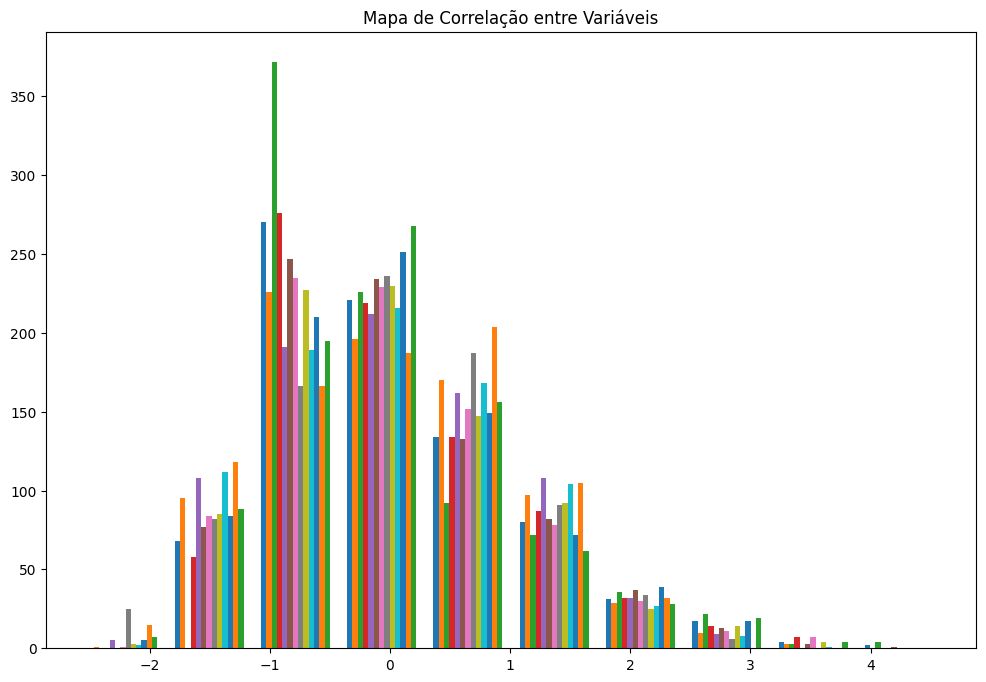

In [49]:
plt.figure(figsize=(12, 8))
plt.hist(x_scaled)
plt.title('Mapa de Correlação entre Variáveis')
plt.show()


In [50]:
model = IsolationForest(n_estimators=256, contamination=0.05, random_state=42)
model.fit(x_train)


IsolationForest(contamination=0.05, n_estimators=256, random_state=42)

In [51]:
y_train_pred = model.predict(x_train)
y_train_pred = np.where(y_train_pred == -1, 1, 0)

In [52]:
y_test_pred = model.predict(x_test)
y_test_pred = np.where(y_test_pred == -1, 1, 0)

In [53]:
print("Treino:")
print("Anomalias detectadas:", sum(y_train_pred))
print("Normais:", len(y_train_pred) - sum(y_train_pred))

print("Teste (Validação Externa):")
print("Anomalias detectadas:", sum(y_test_pred))
print("Normais:", len(y_test_pred) - sum(y_test_pred))


Treino:
Anomalias detectadas: 29
Normais: 549
Teste (Validação Externa):
Anomalias detectadas: 14
Normais: 235


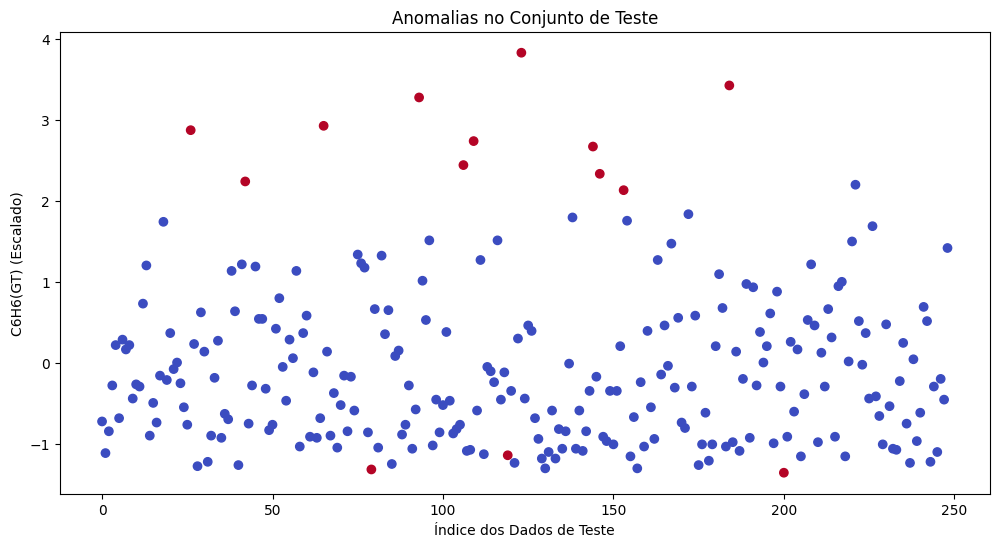

In [54]:
plt.figure(figsize=(12, 6))
plt.title('Anomalias no Conjunto de Teste')
plt.scatter(
    range(len(x_test)), 
    x_test[:, 3],  # Exemplo: coluna 'C6H6(GT)' escalada
    c=y_test_pred, 
    cmap='coolwarm'
)
plt.xlabel('Índice dos Dados de Teste')
plt.ylabel('C6H6(GT) (Escalado)')
plt.show()

In [55]:
df_test = pd.DataFrame(x_test, columns=features)
df_test['Anomaly'] = y_test_pred

print("\nEstatísticas dos dados normais no teste:\n")
print(df_test[df_test['Anomaly'] == 0].describe())

print("\nEstatísticas dos dados anômalos no teste:\n")
print(df_test[df_test['Anomaly'] == 1].describe())


Estatísticas dos dados normais no teste:

           CO(GT)  PT08.S1(CO)    NMHC(GT)    C6H6(GT)  PT08.S2(NMHC)  \
count  235.000000   235.000000  235.000000  235.000000     235.000000   
mean    -0.166414    -0.122121   -0.166874   -0.173463      -0.148570   
std      0.784585     0.870440    0.829434    0.800846       0.860596   
min     -1.386843    -1.675333   -1.056109   -1.304500      -1.731804   
25%     -0.818920    -0.860175   -0.787312   -0.859375      -0.877387   
50%     -0.250998    -0.185703   -0.422517   -0.292852      -0.158174   
75%      0.316924     0.499113    0.136676    0.368091       0.506581   
max      2.020691     1.887365    3.076641    2.202546       1.941250   

          NOx(GT)  PT08.S3(NOx)     NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  235.000000    235.000000  235.000000    235.000000   235.000000   
mean    -0.143193      0.083538   -0.076399     -0.165782    -0.101761   
std      0.838670      0.902011    0.923755      0.829612     0.870958   
min

In [56]:
labels_test = np.zeros(len(x_test))
labels_test[:int(0.05 * len(x_test))] = 1  
np.random.shuffle(labels_test)  

In [ ]:
f1 = f1_score(labels_test, y_test_pred)
cm = confusion_matrix(labels_test, y_test_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[224  13]
 [ 11   1]]
Relatório de Métricas:

              precision    recall  f1-score   support

      Normal       0.95      0.95      0.95       237
    Anomalia       0.07      0.08      0.08        12

    accuracy                           0.90       249
   macro avg       0.51      0.51      0.51       249
weighted avg       0.91      0.90      0.91       249

